# Vaibhav Khandare - Data Science Intern at LetsGrowMore Virtual Internship Program (October-2021)


# BEGINNER LEVEL TASK 02 - Stock Market Prediction And Forecasting Using Stacked LSTM



In [1]:

import pandas as pd

In [2]:
#read the data of training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
print(dataset_train)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


In [5]:
dataset_train.shape

(1258, 6)

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
#read the data of testing set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [8]:
dataset_test.shape

(20, 6)

In [9]:
#for creating visuals of this data we storing it in a temp. variable and opening the data in it.
training_set = dataset_train[ [ 'Open'] ] 

In [10]:
training_set.shape

(1258, 1)

<AxesSubplot:>

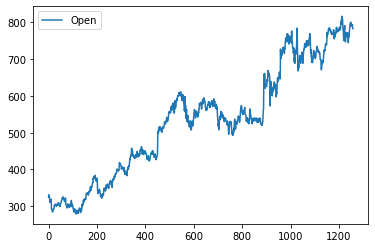

In [11]:
#visuals of training dataset
training_set.plot()

In [12]:
real_stock_price = dataset_test[  [ 'Open']  ]

<AxesSubplot:>

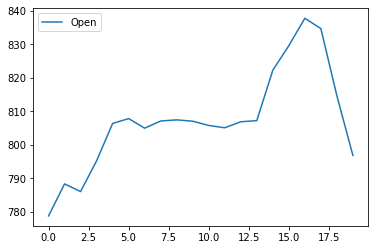

In [13]:
real_stock_price.plot()

In [14]:
#scaling the dataset into a range 0 to 1 for better accuracy.
from sklearn.preprocessing  import MinMaxScaler

In [15]:
normalizer = MinMaxScaler(feature_range=(0,1))

In [16]:
#here we fit and transformed the training scale data into a range of 0 to 1.
training_set_scaled  = normalizer.fit_transform(training_set)

In [17]:
normalizer.inverse_transform(training_set_scaled)

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [18]:
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [19]:
len(training_set_scaled)

1258

In [20]:
training_set_scaled[0:60, 0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [21]:
training_set_scaled[60]

array([0.08627874])

In [22]:
X_train = []

In [23]:
y_train = []

In [24]:
steps =  60

In [25]:
#here we created a loop to split same data into training, here first 0 to 60 data is in xtrain and next 60th is in ytrain
for i in range(len(training_set_scaled) - steps ):
    X_train.append(training_set_scaled[i:i+steps, 0])
    y_train.append(training_set_scaled[i+steps, 0 ])

In [26]:
import numpy as np
X_train_arr = np.array(X_train)

In [27]:
X_train_arr.shape

(1198, 60)

In [28]:
X_train_arr.shape

(1198, 60)

In [29]:
# to reshape xtrain 
X_train_final = np.reshape(X_train, (1198, 60, 1)  )

In [30]:
X_train_final.shape

(1198, 60, 1)

In [31]:
y_train_arr = np.array(y_train)

In [32]:
y_train_arr.shape

(1198,)

In [33]:
# using Sequential  function we are Training our model
from keras.models import Sequential

In [34]:
model = Sequential()

In [35]:
#dense layer to read the edges of image and minimizing a dimension.
from keras.layers  import Dense

In [36]:
from  keras.layers import LSTM

In [37]:
model.add( LSTM( units=60 , return_sequences=True , input_shape= (60, 1)))

In [38]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'lstm_input'}},
  {'class_name': 'LSTM',
   'config': {'name': 'lstm',
    'trainable': True,
    'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 60,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activ

In [39]:
model.add( LSTM( units=60  , return_sequences=True ))

In [40]:
model.add( LSTM( units=60 ))

In [41]:
model.add( Dense( units=1, activation='linear') )

In [42]:
#compiling the model using loss function and optimizer.
model.compile(loss='mean_squared_error', optimizer='adam')

In [43]:
#now time to fit the xtrain and ytrain data into a model
model.fit(X_train_final , y_train_arr, epochs=100)

Epoch 1/100
38/38 [==============================] - 50s 105ms/step - loss: 0.1215
Epoch 2/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0027
Epoch 3/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0020
Epoch 4/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0019
Epoch 5/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0017
Epoch 6/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0017
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0015
Epoch 8/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0016
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0019
Epoch 10/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0015
Epoch 11/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0012
Epoch 12/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0014
Epoch 13/100

38/38 [==============================] - 4s 104ms/step - loss: 4.4315e-04
Epoch 97/100
38/38 [==============================] - 4s 105ms/step - loss: 2.6715e-04
Epoch 98/100
38/38 [==============================] - 4s 102ms/step - loss: 2.8528e-04 0s - loss: 2.82
Epoch 99/100
38/38 [==============================] - 4s 102ms/step - loss: 3.4692e-04
Epoch 100/100
38/38 [==============================] - 4s 104ms/step - loss: 3.0421e-04


In [44]:
#ploting loss function
l = model.history.history["loss"]

In [45]:
import matplotlib.pyplot as plt

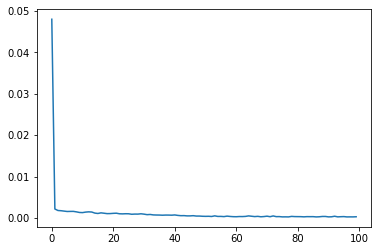

In [46]:
plt.plot(l)

In [47]:
#predicting the 
predict = model.predict(X_train_final)

In [48]:
predict


array([[0.08326909],
       [0.08556852],
       [0.08659552],
       ...,
       [0.9463127 ],
       [0.9525548 ],
       [0.9300746 ]], dtype=float32)

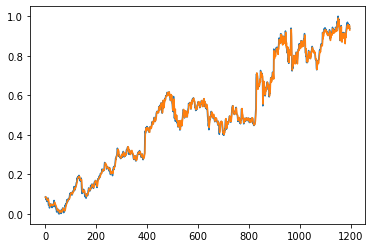

In [49]:
plt.plot(y_train_arr)
plt.plot(predict)

In [50]:
pdl =  pd.DataFrame(l)

<AxesSubplot:>

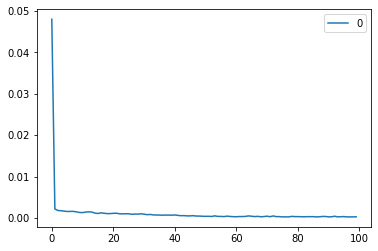

In [51]:
pdl.plot()